# Notebook 3: Linear Regression (Diabetes) 
Yi Ming Chang<br>
B00751897<br>
Jan. 26th, 2021

### Exercise 1: ###  
<ul>


<li> (TRY THIS) Is $\hat{\textbf{w}}$ a biased or an unbiased estimator? In other words, does it give the correct answer as the number of data points goes to infinity ($n \rightarrow \infty$). To answer this question, you may assume i.i.d. (independent, identically distributed) samples $(y_i,\textbf{x}^{(i)})$.

# Answers:

As the number of data goes to infinity (n $\rightarrow$ $\infty$), n is much greater than p, which usually $\textbf{X}^T\textbf{X}$ is invertible.  If ranked($\textbf{X}$) = p, then the preductors are linealry independent, so $\hat{\textbf{w}}$ is unique solution.The $\hat{\textbf{w}}$ is an unbiased estimator because bias error is 0 and the estimator tends to be right on target. They should not be systematically too high or too low.


### Exercise 3: ###  

<li> (DO THIS) Do you think LASSO and Ridge Regression will give qualitatively different answers? (Consider the limits $\lambda=0$ and $\lambda = \infty$)
</ul>

# Answers

Let's expand the regularization term of these two functions first.
$$
\mathbf{w}_{ridge}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} ||\mathbf{X}\textbf{w}-\textbf{y}||_2^2 + \lambda ||\textbf{w}||_2^2  = \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}}\sum^p_{i=1} [(w^Tx^{(i)}-y_{i})^2+\lambda|w_i|^2)]
$$
$$
\textbf{w}_{LASSO}(\lambda)= \underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}} {1 \over 2n} ||\mathbf{Xw}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1=\underset{\textbf{w}\in\mathbb{R}^p}{\operatorname{argmin}}\sum^p_{i=1} [(w^Tx^{(i)}-y_{i})^2+\lambda|w_i|)]
$$


L1-norm is the sum of the magnitudes of the vectors in a space. It is the sum of absolute difference of the components of the vectors.<br>
L2-norm is square root of the sum of all components in the vector, $\vec{w}$. <br>
After taking square of L2-norm, one equals $|w_1| + .. +|w_d|$ and the other equals $|w_1|^2+..+|w_d|^2$. The difference of them is all of the components of the vecot are squared.
If $\lambda = 0$, the difference on the regularization between $\mathbf{w}_{ridge}$ and $\textbf{w}_{LASSO}$ is gone, so they will not give any qualitatively different answers.<br>
If $\lambda = \infty$, I do not think there is difference between $1*\infty$ and $5*\infty$. So, there is no qualitatively different answers between LASSO and Ridge Regression.

Automatically created module for IPython interactive environment


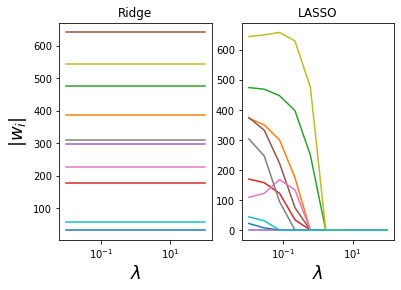

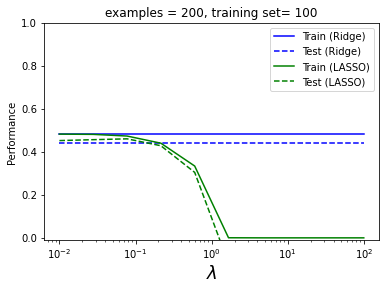

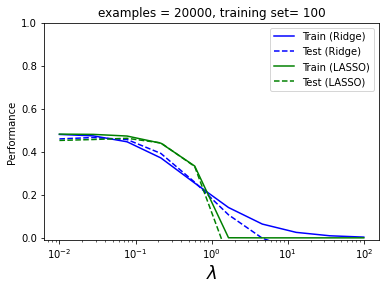

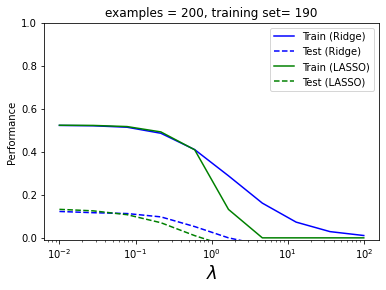

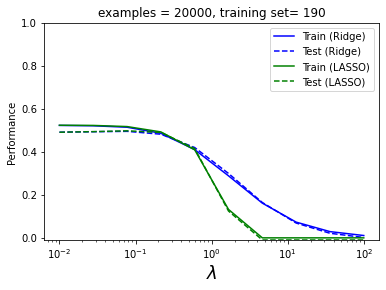

In [1]:
from __future__ import print_function
print(__doc__)

%matplotlib inline

# This code is modified from plot_cv_diabetes.py in the skit-learn documentation
# and plot_ridge_path.py


import numpy as np
import matplotlib.pyplot as plt
#import seaborn

from sklearn import datasets, linear_model

# Load Training Data set with 200 examples

number_examples= 200
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# Set up Lasso and Ridge Regression models
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()


# Chooose paths
alphas = np.logspace(-2, 2, 10)

# To see how well we learn, we partition the dataset into a training set with 150 
# as well as a test set with 50 examples. We record their errors respectively.

n_samples = 150
n_samples_train = 100
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
train_errors_ridge = list()
test_errors_ridge = list()

train_errors_lasso = list()
test_errors_lasso = list()



# Initialize coeffficients for ridge regression and Lasso

coefs_ridge = []
coefs_lasso=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))
    
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
plt.subplot(1,2,1)
plt.semilogx(alphas, np.abs(coefs_ridge))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Ridge')
#plt.savefig("Ridge_sparsity_scale.pdf.pdf")



plt.subplot(1,2,2)
plt.semilogx(alphas, np.abs(coefs_lasso))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
#plt.ylabel('$|\mathbf{w}|$',fontsize=18)
plt.title('LASSO')
#plt.savefig("LASSO_sparsity_scale.pdf")
plt.show()



# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
plt.title('examples = 200, training set= 100')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()

# Load Training Data set with 2000 examples

number_examples= 20000
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# Set up Lasso and Ridge Regression models
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()


# Chooose paths
alphas = np.logspace(-2, 2, 10)

# To see how well we learn, we partition the dataset into a training set with 150 
# as well as a test set with 50 examples. We record their errors respectively.

n_samples = 150
n_samples_train = 100 #190
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
train_errors_ridge = list()
test_errors_ridge = list()

train_errors_lasso = list()
test_errors_lasso = list()



# Initialize coeffficients for ridge regression and Lasso

coefs_ridge = []
coefs_lasso=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))
    
###############################################################################
# Display results



# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
plt.title('examples = 20000, training set= 100')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()



# Load Training Data set with 200 examples

number_examples= 200
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# Set up Lasso and Ridge Regression models
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()


# Chooose paths
alphas = np.logspace(-2, 2, 10)

# To see how well we learn, we partition the dataset into a training set with 190
# as well as a test set with 150 examples. We record their errors respectively.

n_samples = 150
n_samples_train = 190 
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
train_errors_ridge = list()
test_errors_ridge = list()

train_errors_lasso = list()
test_errors_lasso = list()



# Initialize coeffficients for ridge regression and Lasso

coefs_ridge = []
coefs_lasso=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))
    
###############################################################################
# Display results



# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
plt.title('examples = 200, training set= 190')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()


# Load Training Data set with 20000examples

number_examples= 20000
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# Set up Lasso and Ridge Regression models
ridge=linear_model.Ridge()
lasso = linear_model.Lasso()


# Chooose paths
alphas = np.logspace(-2, 2, 10)

# To see how well we learn, we partition the dataset into a training set with 150 
# as well as a test set with 50 examples. We record their errors respectively.

n_samples = 150
n_samples_train = 190
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
train_errors_ridge = list()
test_errors_ridge = list()

train_errors_lasso = list()
test_errors_lasso = list()



# Initialize coeffficients for ridge regression and Lasso

coefs_ridge = []
coefs_lasso=[]
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)
    
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors_ridge.append(ridge.score(X_train, y_train))
    test_errors_ridge.append(ridge.score(X_test, y_test))
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    train_errors_lasso.append(lasso.score(X_train, y_train))
    test_errors_lasso.append(lasso.score(X_test, y_test))
    
###############################################################################
# Display results



# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_ridge, 'b',label='Train (Ridge)')
plt.semilogx(alphas, test_errors_ridge, '--b',label='Test (Ridge)')
plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
plt.title('examples = 20000, training set= 190')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Ridge_LASSO_sparsity_performance.pdf")
plt.show()



### (DO THIS) Exercise 4: ###  
<ul>
<li>What do the points $\lambda=0$ and $\lambda=10^5$ correspond to? Is it strange that the weights are not monotonic in $\alpha$? Why do you think this might be?
<li>Make a similar regularization plot for LASSO? 
<li> What is the qualitative difference between the LASSO path and Ridge Path? Does this agree with your earlier predictions? Can you make some qualitative argument to rationalize this difference?
<li>How do your answers change when you vary the number of examples and training set size?
</ul>

I am not sure what plot it is asking, I guess I will answer all of them.
For $\lambda = 0$: the weights of Ridge has various values, fluctuated from 150 to 0. The plot of LASSO's weights are fluctuated around 250 to 0. For the performace plot, $\lambda = $ correspond to (near) $10^0$ has a value around 0.25 and 0.2.<br>
For $\lambda = 10^5$ (I assume the question is asking for large value of $\lambda$): all of the plots go to zero as $\lambda$ is large. I don't think it is strange that the weights are not monotonic in $\alpha$, we know the OLS and Ridge regression test curves are monontonic, and the LASSO test curve is not, but doesn't mean the plot of weights ($\alpha$) has to be monotonic. It is not the only factor inside the data/method. 

LASSO tends to give sparse solutions (many components of $\hat{\textbf{w}}_{LASSO}$ are zero. LASSO has more restrict on the value of choosing $\lambda$. In the performance plot, the Ridge and LASSO regressions intercept at the point of $\lambda = 0$ (train and test set of Ridge intercept with train and test set of LASSO). And they both go to zero as $\lambda\rightarrow\infty$. These agreed with my earlier predicitons. I think the qualitative difference comes from regularization of the methods. LASSO uses L1-norm and Ridge uses L2-norm. 

Increased the number of examples (20000) only, makes the in-sample fit the out-of-sample curves better for both regression. <br>
Increased the number of training set size (190) makes the Ridge's out-of-smaple (performance) fits LASSO's out-of-sample better, and Ridge's in-sample fits LASSO's in-sample better. 

Increased both the number of examples (20000) and training set size (190), the in-sample of Ridge and LASSO overlap together when $\lambda<0$, same as the out-of-sample for both methods. After the curves pass through 0, the in-sample and out-of-sample overlap together for both methods. Overall, the more number of example, the closer in-sample (train) and out-of-sample (test) error got closer.

Automatically created module for IPython interactive environment


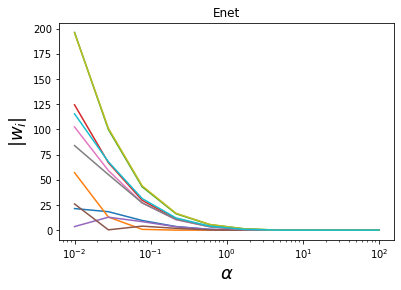

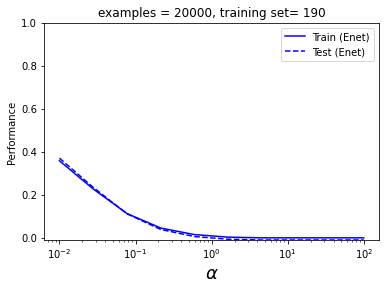

In [59]:
from __future__ import print_function
print(__doc__)

%matplotlib inline

# This code is modified from plot_cv_diabetes.py in the skit-learn documentation


import numpy as np
import matplotlib.pyplot as plt
#import seaborn

from sklearn import datasets, linear_model

# Load Training Data set with 200 examples

number_examples= 20000
diabetes = datasets.load_diabetes()
X = diabetes.data[:number_examples]
y = diabetes.target[:number_examples]

# Set up Lasso and Enet Regression models
Enet=linear_model.ElasticNet()
lasso = linear_model.Lasso()


# Chooose paths
alphas = np.logspace(-2, 2, 10)

# To see how well we learn, we partition the dataset into a training set with 150 
# as well as a test set with 50 examples. We record their errors respectively.

n_samples = 150
n_samples_train = 190
X_train, X_test = X[:n_samples_train], X[n_samples_train:]
y_train, y_test = y[:n_samples_train], y[n_samples_train:]
train_errors_Enet = list()
test_errors_Enet = list()

train_errors_lasso = list()
test_errors_lasso = list()



# Initialize coeffficients for Enet regression and Lasso

coefs_Enet = []
#coefs_lasso=[]
for a in alphas:
    Enet.set_params(alpha=a, )
    Enet.fit(X_train, y_train)
    coefs_Enet.append(Enet.coef_)
    
    # Use the coefficient of determination R^2 as the performance of prediction.
    train_errors_Enet.append(Enet.score(X_train, y_train))
    test_errors_Enet.append(Enet.score(X_test, y_test))
    
    ##lasso.set_params(alpha=a)
    #lasso.fit(X_train, y_train)
    #coefs_lasso.append(lasso.coef_)
    #train_errors_lasso.append(lasso.score(X_train, y_train))
    #test_errors_lasso.append(lasso.score(X_test, y_test))
    
###############################################################################
# Display results

# First see how the 10 features we learned scale as we change the regularization parameter
#plt.subplot(1,2,1)
plt.semilogx(alphas, np.abs(coefs_Enet))
axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\lambda$',fontsize=18)
plt.ylabel('$|w_i|$',fontsize=18)
plt.title('Enet')
#plt.savefig("Enet_sparsity_scale.pdf.pdf")



#plt.subplot(1,2,2)
#plt.semilogx(alphas, np.abs(coefs_lasso))
#axes = plt.gca()
#ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel(r'$\alpha$',fontsize=18)
#plt.ylabel('$|\mathbf{w}|$',fontsize=18)
#plt.title('LASSO')
#plt.savefig("LASSO_sparsity_scale.pdf")
plt.show()



# Plot our performance on both the training and test data
plt.semilogx(alphas, train_errors_Enet, 'b',label='Train (Enet)')
plt.semilogx(alphas, test_errors_Enet, '--b',label='Test (Enet)')
#plt.semilogx(alphas, train_errors_lasso, 'g',label='Train (LASSO)')
#plt.semilogx(alphas, test_errors_lasso, '--g',label='Test (LASSO)')
plt.title('examples = 20000, training set= 190')
#plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
#           linewidth=3, label='Optimum on test')
plt.legend(loc='upper right')
plt.ylim([-0.01, 1.0])
plt.xlabel(r'$\alpha$',fontsize=18)
plt.ylabel('Performance')
#plt.savefig("Enet_LASSO_sparsity_performance.pdf")
plt.show()


### Exercise T: ###  
<ul>
<li> (DO THIS) Play with the parameters $\lambda$ and $\delta$, when would you expect sparse solutions?

<li> (DO THIS) Plot the regularization path of elastic net. How does it depend on $\lambda$ and $\delta$?

# Answers:

$\hat{\textbf{w}}_{ElasticNet} =  ||y - X\textbf{w}||^2_2 + \alpha l1_{ratio}  ||w||_1+ 0.5 \alpha (1 - l1_{ratio}) ||\textbf{w}||^2_2 =\underset{\mathbf{w}\in\mathbb{R}^p}{\operatorname{min}} ||\mathbf{Xw}-\mathbf{y}||_2^2 + \lambda ||\mathbf{w}||_1 + \delta||\mathbf{w}||_2^2,$

I expect to have spare solutions when $\alpha = 0$. Since Elastic net combines some of the desirable properties (e.g. prediction) of ridge regression with the sparsity properties of the LASSO. Also, based on the plot we have above, when $\alpha > 0$, we start to obtain spare solutions. I am not sure how to plot a surface plot of the regulartion path of elastic net, since I have one parameter only, $\alpha$. But I know both $\lambda$ and $\sigma$ is depended on $\alpha$. So, I made the regularization path of elastic net with $\alpha$ only.

### (DO THIS) End-of-notebook questions ###  
<ul>

<li> Can you explain the difference between in-sample and out-of-sample performance? Is out-of-sample error usually larger than in-sample error? Does this depend on regularization? Recall in Exercise 1, we defined the in-sample risk as 

$$
R_{in}(\hat{\textbf{w}}, \textbf{w}_\text{true})=\frac{1}{n}\mathbb{E}[(\mathbf{X}\hat{\textbf{w}}-\mathbf{X}{\textbf{w}_\text{true}})^2],
$$ 
where $\hat{\textbf{w}}= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \textbf{y}$ is the least square solution and $\textbf{w}_\text{true}$ is the true parameter vector used to generate all samples. Following the same notation and assumption, now imagine if we're given a new data point $\textbf{x}_0$ independently drawn from the predictor distribution $\mathcal{P}$. We can define the out-of-sample risk as 
$$
R_{out} =\mathbb{E}_{\textbf{x}^{(0)}\sim\mathcal{P}}\mathbb{E}_{(y_i,\textbf{x}_i)}[(\hat{\textbf{w}}\cdot \textbf{x}_0 -\textbf{w}_\text{true}\cdot \textbf{x}_0)^2],
$$
with the expectation value taken not only over the training samples $(y_i,\textbf{x}_i)$ but also over the predictor distribution $\mathcal{P}$ that generates the unseen sample $\textbf{x}^{(0)}$. One can actually show that $R_{out}\ge R_{in}$ under mild assumptions. This makes sense intuitively since it's usually harder to make prediction on unseen samples than to fit the samples given. You can numerically verify this by assuming a predictor distribution, say, $\mathcal{N}(0,\Sigma)$.
</ul>

The difference between in-sample and out-of-sample performance is precisely the quantity that measures the difference between fitting and predicting. Yes, out-of-sample error usually larger than in-sample error. Yes this depend on regularization in some points, becasue the statistical learning theory is that it is not enough to minimize the training error, because the out-of-sample error can still be large. So we need use regularization that prevents overfitting.